In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17582, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 17582 (delta 0), reused 0 (delta 0), pack-reused 17579 (from 2)
Receiving objects: 100% (17582/17582), 16.83 MiB | 7.02 MiB/s, done.
Resolving deltas: 100% (11978/11978), done.
/kaggle/working/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.8 MB/s eta 0:00:0000:0100:01
   ━━

In [2]:
!ls /kaggle/input/rgbappledataset

OpenAcces_RGBD_apple_dataset_YOLO-DET


In [3]:
# Check images and labels exist
!ls /kaggle/input/rgbappledataset/OpenAcces_RGBD_apple_dataset_YOLO-DET/images/train | head -n 5
!ls /kaggle/input/rgbappledataset/OpenAcces_RGBD_apple_dataset_YOLO-DET/labels/val | head -n 5

2022_06_17_1_0m_HIGH_P1.png
2022_06_17_1_0m_HIGH_P2.png
2022_06_17_1_0m_LOW_P1.png
2022_06_17_1_0m_LOW_P2.png
2022_06_17_1_5m_FULL_TREE_P1.png
ls: cannot access '/kaggle/input/rgbappledataset/OpenAcces_RGBD_apple_dataset_YOLO-DET/labels/val': No such file or directory


In [4]:
import yaml

dataset_yaml = {
    'path': '/kaggle/input/rgbappledataset/OpenAcces_RGBD_apple_dataset_YOLO-DET',
    'train': 'images/train',
    'val': 'images/train',  # 👈 same as train
    'nc': 6,
    'names': {
        0: 'apple_Y5L_std_bbox',
        1: 'apple_manual_annot',
        2: 'apple_Y5L_trained_bbox',
        3: 'TB_manual_annot',
        4: 'TB_Y5L_std_bbox',
        5: 'TB_Y5L_trained_bbox'
    }
}

with open('/kaggle/working/dataset.yaml', 'w') as f:
    yaml.dump(dataset_yaml, f, sort_keys=False)

print("✅ dataset.yaml created at /kaggle/working/dataset.yaml")


✅ dataset.yaml created at /kaggle/working/dataset.yaml


In [5]:
!python train.py --img 640 --batch 16 --epochs 50 \
  --data /kaggle/working/dataset.yaml \
  --weights yolov5s.pt --cache

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-09-29 03:54:32.633332: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759118072.881807     107 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759118072.953481     107 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS wh

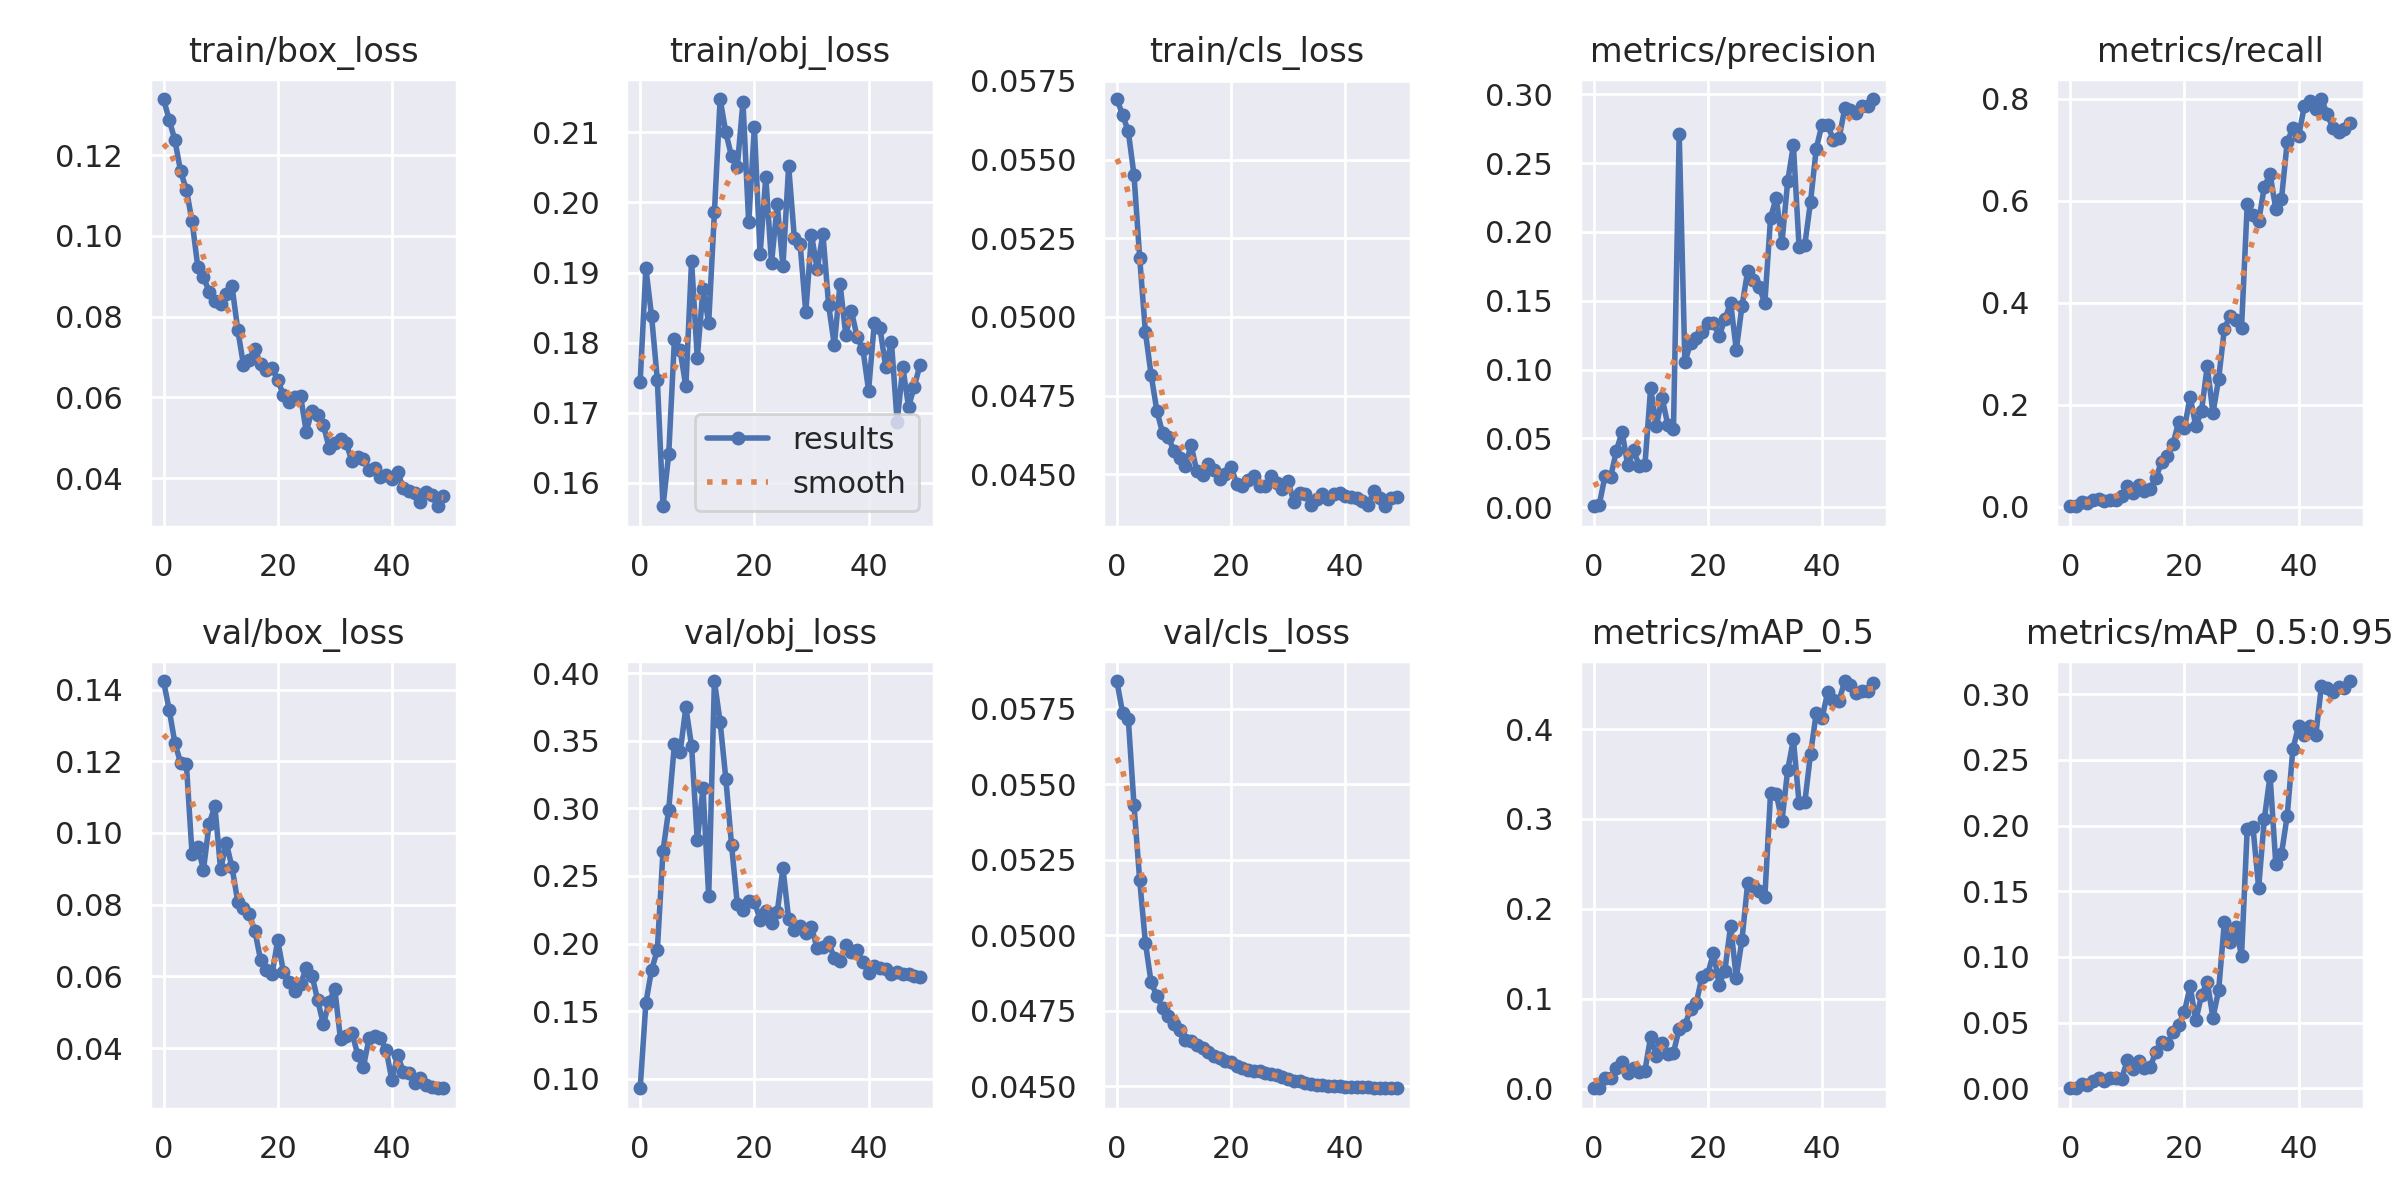

In [6]:
from IPython.display import Image

# Show results (loss, mAP curves etc.)
Image(filename='runs/train/exp/results.png', width=800)


In [7]:
!python detect.py \
  --weights /kaggle/working/yolov5/runs/train/exp/weights/best.pt \
  --img 640 \
  --conf 0.25 \
  --source /kaggle/input/newapples/test_images/ \
  --save-txt \
  --save-conf


detect: weights=['/kaggle/working/yolov5/runs/train/exp/weights/best.pt'], source=/kaggle/input/newapples/test_images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_format=0, save_csv=False, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-432-g725b922e Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7026307 parameters, 0 gradients, 15.8 GFLOPs
image 1/2 /kaggle/input/newapples/test_images/P1.png: 384x640 37 apple_Y5L_std_bboxs, 234.5ms
image 2/2 /kaggle/input/newapples/test_images/P2.png: 384x640 38 apple_Y5L_std_bboxs, 169.4ms
Speed: 2.2ms pre-process, 202.0ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs

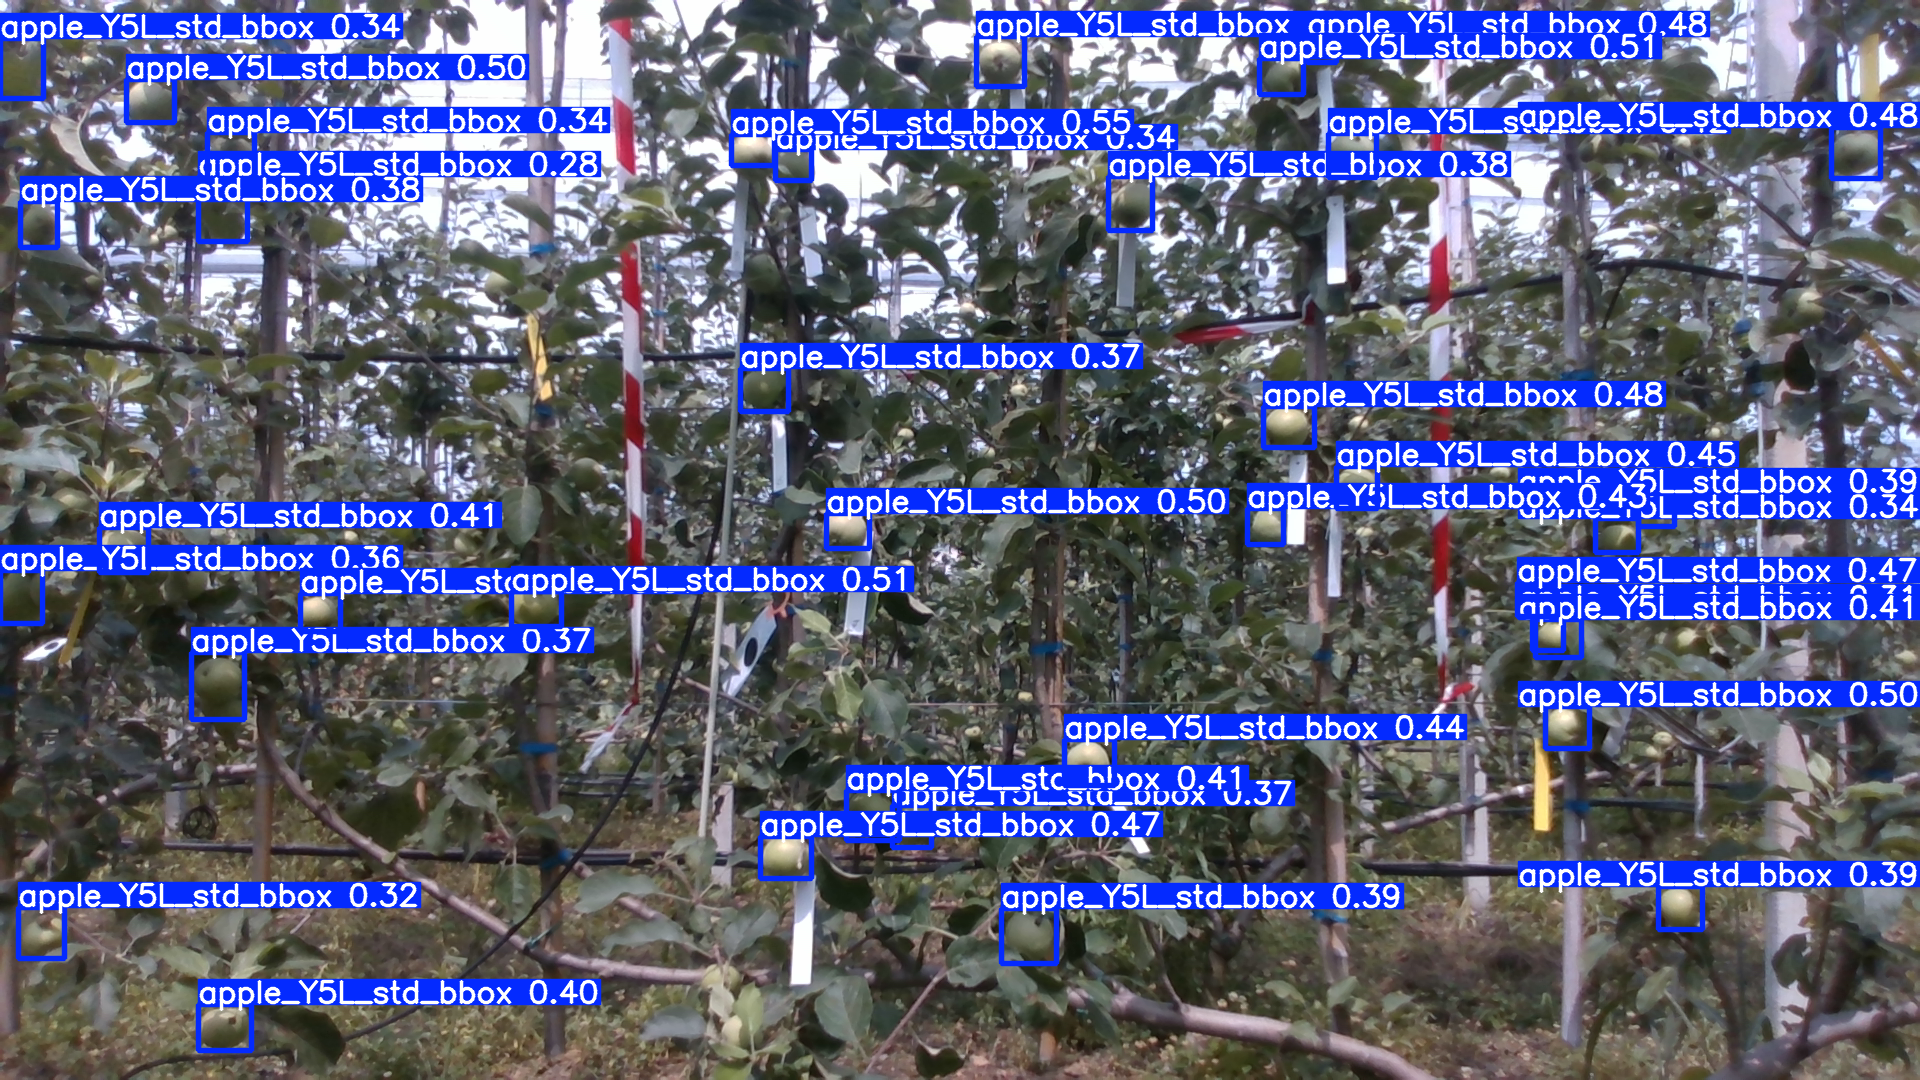

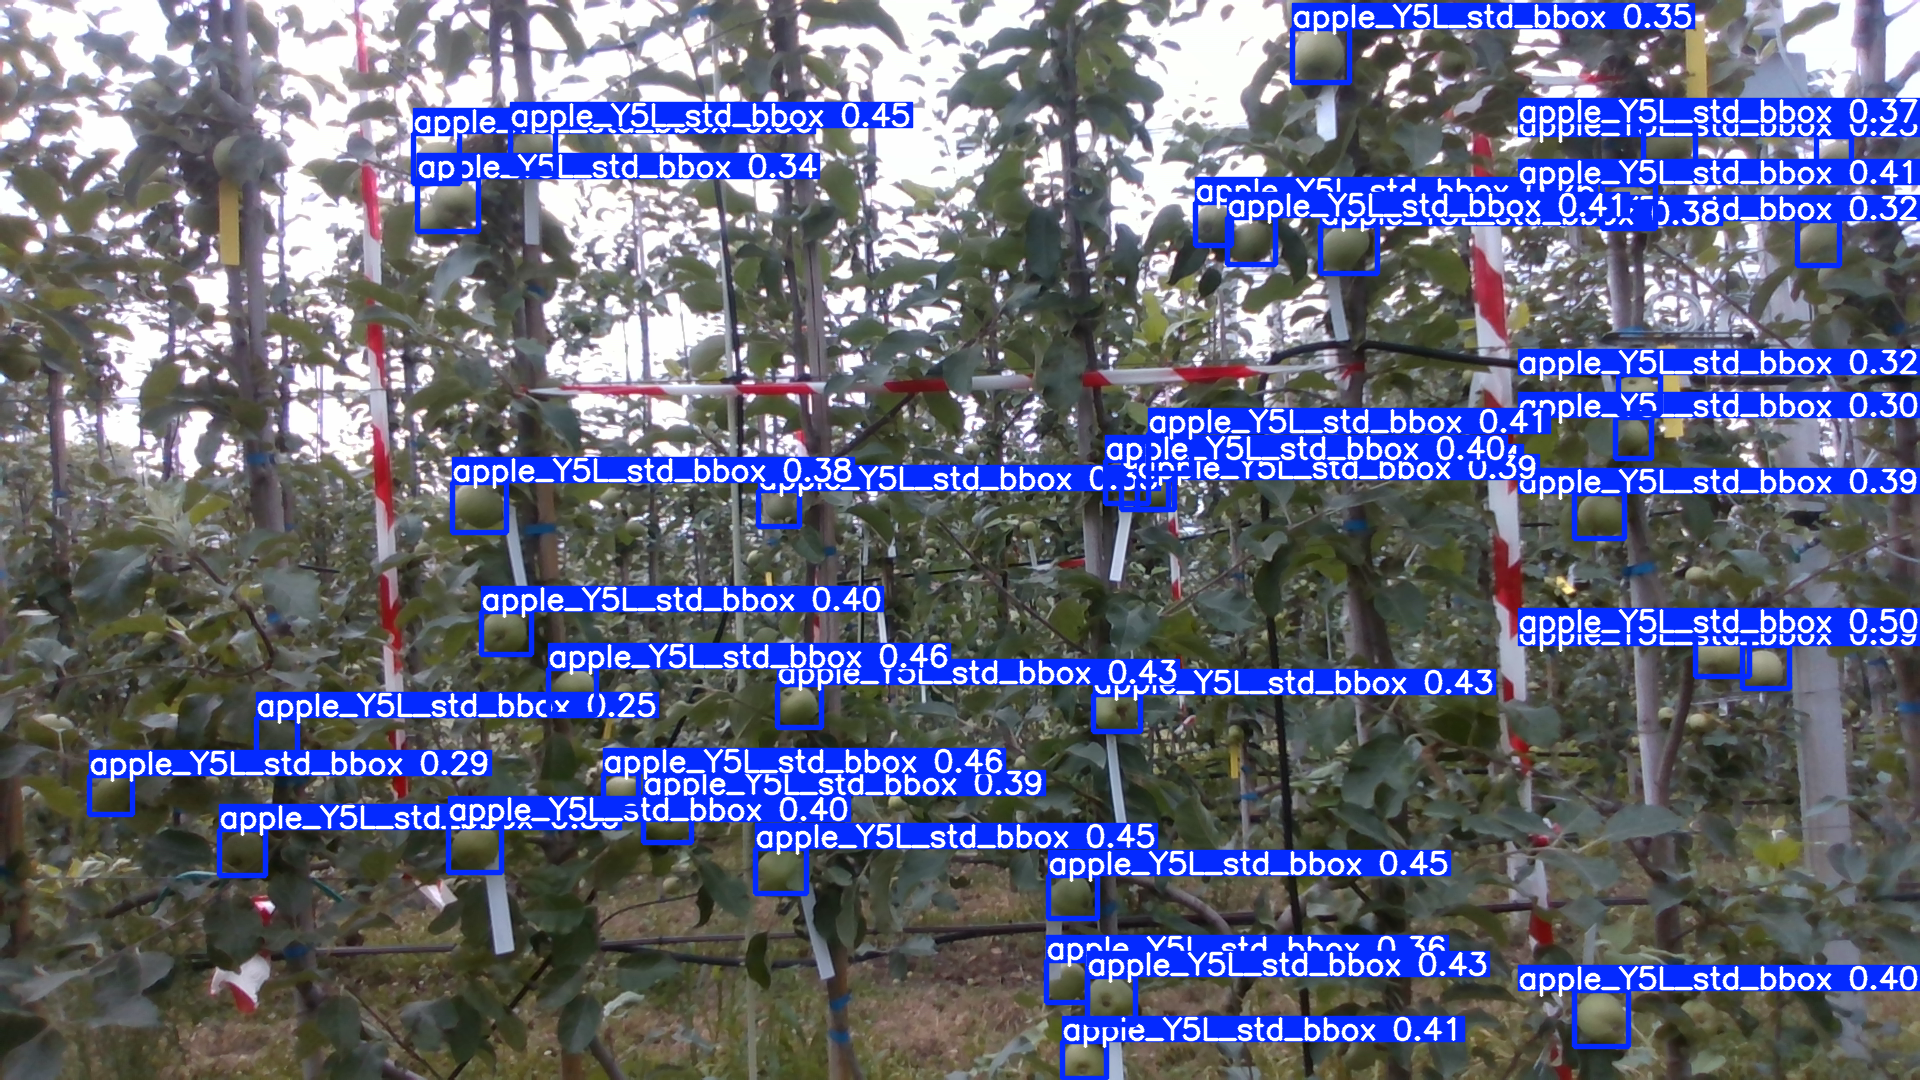

In [11]:
import glob
from IPython.display import Image, display

# Path to YOLO detection results
for img_path in glob.glob('/kaggle/working/yolov5/runs/detect/exp/*.png'):
    display(Image(filename=img_path))
